### Importation of the necessary library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### loading the data from excel file into the memory and into the current working directory

In [2]:
df = pd.read_excel("C:/Users/hp/Downloads/Quantum data/QVI_transaction_data.xlsx")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Performed some data cleaning on the given dataset

In [3]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### Loading the second dataset

In [4]:
df2 = pd.read_csv("C:/Users/hp/Downloads/Quantum data/QVI_purchase_behaviour.csv")
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Merged both transaction data and purchase behaviour dataset together to perform data cleaning and exploratory data analysis

In [5]:
merge_data = df.merge(df2, on="LYLTY_CARD_NBR", how="right")
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [6]:
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [7]:
merge_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [8]:
merge_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
merge_data["DATE"].dtypes

dtype('int64')

In [10]:
merge_data["STORE_NBR"].dtypes

dtype('int64')

In [11]:
merge_data["LYLTY_CARD_NBR"].dtypes

dtype('int64')

In [12]:
merge_data["TXN_ID"].dtypes

dtype('int64')

In [13]:
merge_data["PROD_NBR"].dtypes

dtype('int64')

In [14]:
merge_data["PROD_NAME"].dtypes

dtype('O')

In [15]:
merge_data["DATE"].unique()

array([43390, 43599, 43414, 43533, 43605, 43329, 43330, 43604, 43318,
       43321, 43446, 43529, 43601, 43287, 43299, 43562, 43423, 43434,
       43479, 43646, 43332, 43288, 43352, 43360, 43404, 43316, 43405,
       43470, 43572, 43602, 43344, 43361, 43526, 43590, 43535, 43643,
       43603, 43462, 43452, 43497, 43540, 43631, 43600, 43315, 43460,
       43565, 43645, 43400, 43326, 43597, 43350, 43395, 43454, 43467,
       43563, 43328, 43383, 43478, 43485, 43306, 43394, 43424, 43480,
       43521, 43628, 43635, 43331, 43325, 43403, 43327, 43333, 43294,
       43358, 43396, 43451, 43566, 43336, 43349, 43435, 43456, 43475,
       43585, 43591, 43611, 43574, 43376, 43564, 43619, 43313, 43374,
       43445, 43539, 43549, 43312, 43438, 43439, 43440, 43339, 43427,
       43310, 43357, 43553, 43615, 43613, 43514, 43364, 43468, 43507,
       43556, 43579, 43282, 43317, 43345, 43622, 43363, 43444, 43473,
       43552, 43612, 43320, 43387, 43441, 43525, 43393, 43411, 43614,
       43286, 43314,

In [16]:
merge_data["DATE"] = pd.to_datetime(merge_data["DATE"])

In [17]:
merge_data["DATE"].unique()

array(['1970-01-01T00:00:00.000043390', '1970-01-01T00:00:00.000043599',
       '1970-01-01T00:00:00.000043414', '1970-01-01T00:00:00.000043533',
       '1970-01-01T00:00:00.000043605', '1970-01-01T00:00:00.000043329',
       '1970-01-01T00:00:00.000043330', '1970-01-01T00:00:00.000043604',
       '1970-01-01T00:00:00.000043318', '1970-01-01T00:00:00.000043321',
       '1970-01-01T00:00:00.000043446', '1970-01-01T00:00:00.000043529',
       '1970-01-01T00:00:00.000043601', '1970-01-01T00:00:00.000043287',
       '1970-01-01T00:00:00.000043299', '1970-01-01T00:00:00.000043562',
       '1970-01-01T00:00:00.000043423', '1970-01-01T00:00:00.000043434',
       '1970-01-01T00:00:00.000043479', '1970-01-01T00:00:00.000043646',
       '1970-01-01T00:00:00.000043332', '1970-01-01T00:00:00.000043288',
       '1970-01-01T00:00:00.000043352', '1970-01-01T00:00:00.000043360',
       '1970-01-01T00:00:00.000043404', '1970-01-01T00:00:00.000043316',
       '1970-01-01T00:00:00.000043405', '1970-01-01

In [18]:
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


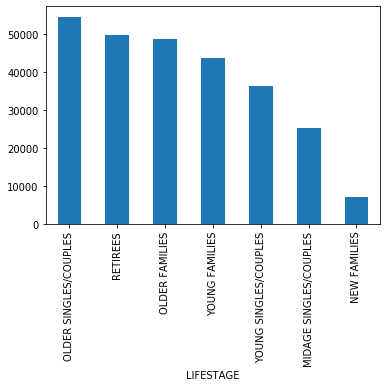

In [19]:
merge_data.groupby("LIFESTAGE")["LIFESTAGE"].count().nlargest(20).plot.bar()
plt.show()

### The older singles and couples tend to buy the product more than any other life stage

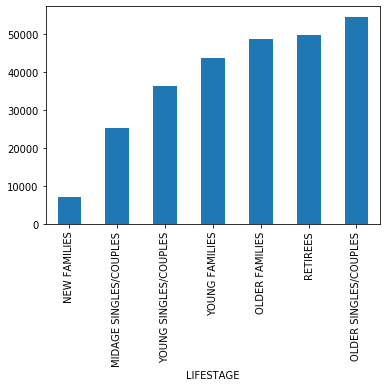

In [20]:
merge_data.groupby("LIFESTAGE")["LIFESTAGE"].count().nsmallest(20).plot.bar()
plt.show()

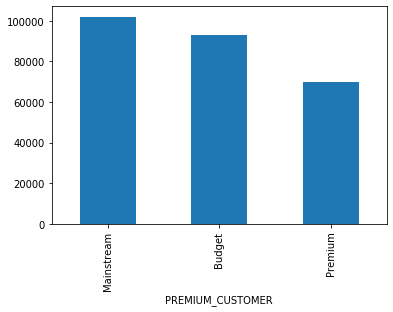

In [21]:
merge_data.groupby("PREMIUM_CUSTOMER")["PREMIUM_CUSTOMER"].count().nlargest(20).plot.bar()
plt.show()

### Mainstream  premium customer  tend to buy the products more than Budget and Premium 

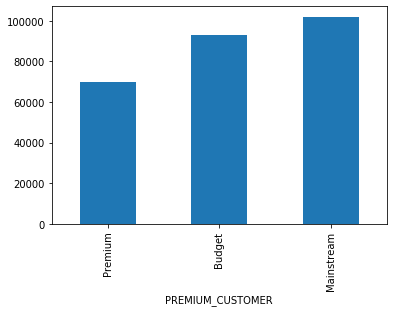

In [22]:
merge_data.groupby("PREMIUM_CUSTOMER")["PREMIUM_CUSTOMER"].count().nsmallest(20).plot.bar()
plt.show()

In [23]:
merge_data["Month"] = merge_data["DATE"].dt.month

In [24]:
merge_data["Month"].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [25]:
merge_data["Year"] = merge_data["DATE"].dt.year

In [26]:
merge_data["Year"].head() 

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: int64

In [27]:
merge_data["Days"] = merge_data["DATE"].dt.day

In [28]:
merge_data["Days"].head()

0    1
1    1
2    1
3    1
4    1
Name: Days, dtype: int64

In [29]:
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Year,Days
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,1,1970,1
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
2,1970-01-01 00:00:00.000043414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
3,1970-01-01 00:00:00.000043533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
4,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1,1970,1


In [30]:
merge_data.groupby("Days")["TOT_SALES"].sum()

Days
1    1934415.0
Name: TOT_SALES, dtype: float64

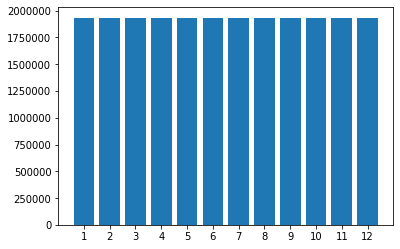

In [31]:
months = range(1,13)
plt.bar(months,merge_data.groupby("Month")["TOT_SALES"].sum())
plt.xticks(months)
plt.show()

### months is not the real factor to determine the percentages of the sales and the increase of sales, there is a close relationship between the sales of the products every month

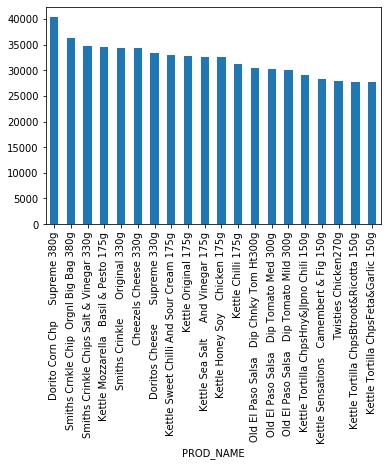

In [32]:
merge_data.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(20).plot(kind="bar")
plt.show()

### Dorito Corn Chp Supreme 380g products has the highest sales out of the top 20 of the products sales

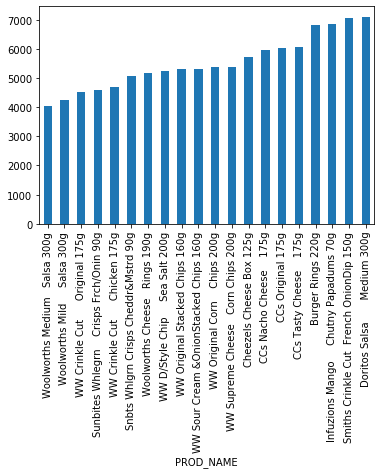

In [33]:
merge_data.groupby("PROD_NAME")["TOT_SALES"].sum().nsmallest(20).plot(kind="bar")
plt.show()

### Woolworths Medium Salsa 300g has the least sales out of the products sold 

In [34]:
df = merge_data["LYLTY_CARD_NBR"].duplicated(keep=False)
df2 = merge_data[df]
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Year,Days
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
2,1970-01-01 00:00:00.000043414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
3,1970-01-01 00:00:00.000043533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
7,1970-01-01 00:00:00.000043604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1
8,1970-01-01 00:00:00.000043318,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,1,1970,1


In [35]:
df2["Grouped"] = df2.groupby("LYLTY_CARD_NBR")["PROD_NAME"].transform(lambda x:",".join(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Year,Days,Grouped
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"CCs Nacho Cheese 175g,WW Original Stacked C..."
2,1970-01-01 00:00:00.000043414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"CCs Nacho Cheese 175g,WW Original Stacked C..."
3,1970-01-01 00:00:00.000043533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"CCs Nacho Cheese 175g,WW Original Stacked C..."
7,1970-01-01 00:00:00.000043604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Old El Paso Salsa Dip Tomato Mild 300g,Tyrre..."
8,1970-01-01 00:00:00.000043318,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Old El Paso Salsa Dip Tomato Mild 300g,Tyrre..."


In [37]:
df2 = df2.drop_duplicates(subset=["LYLTY_CARD_NBR"])
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Month,Year,Days,Grouped
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"CCs Nacho Cheese 175g,WW Original Stacked C..."
7,1970-01-01 00:00:00.000043604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Old El Paso Salsa Dip Tomato Mild 300g,Tyrre..."
12,1970-01-01 00:00:00.000043601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Smiths Crinkle Chips Salt & Vinegar 330g,Kettl..."
16,1970-01-01 00:00:00.000043601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Grain Waves Sweet Chilli 210g,Old El P..."
21,1970-01-01 00:00:00.000043332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,1,1970,1,"Doritos Corn Chip Mexican Jalapeno 150g,Red Ro..."


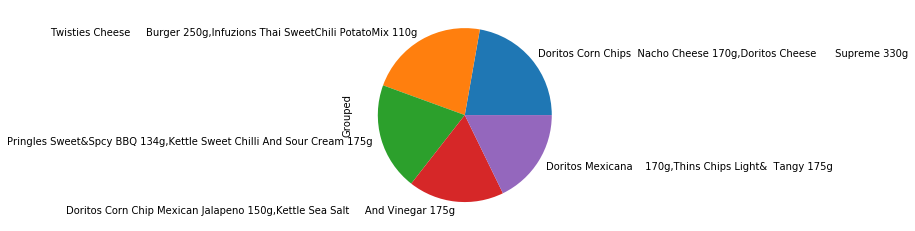

In [38]:
df2["Grouped"].value_counts()[0:5].plot.pie()
plt.show()

### There is a close relationship between the products often sold together 

#                     Conclusion
##        Insight derived from the product sales of chips
### 1. Older singles and couples tend to buy the product more than the other lifestage, the product manager                      should focus more on older singles and couples than the other life stages
### 2.  Mainstream tend to buy the product more than the other premium customers, the product manager should               focus more on mainstream than other premium customers to sustain there interest in the product
### 3. There is a regular sales in every month, the project manager should not consider month as a factors to                       determine the increase of sales of the product
###  4. Dorito corn chp supreme 300g has the highest sales out of all the product, the product manager should                      increase the production of Dorito corn chp supreme 300g
###   5. Woolworths mediums salsa 300g has the least sales out of all the products sold, the product manger                        should reduce the production of Wooworths medium salsa 300g, customers has low interest in buying the                product
###    6. There is a close relationship between the product often sold together, the product manager should not                     consider product often sold together as a factor to determine sales of the product
